# Single Pendulum

In [2]:
# import packages
import numpy as np
import scipy.integrate as spi
import sympy as sym
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
%matplotlib inline

<font color='darkblue'> The movement of the pendulum is described with the following formula:
    
<font color='darkblue'>$\theta^{''}(t) +\frac{b}{m}\theta^{'}(t) +\frac{g}{L}\theta(t) = 0$ 
    
<font color='darkblue'> In oder to simulate this ODE of second order  with SciPy, we have to first convert it into a ODE of first order.    
    
<font color='darkblue'> If we rearrange this formula, so that we have $\theta^{''}$ isolated, we get the following formula:    
   
<font color='darkblue'>$\theta^{''}(t) = -\frac{b}{m}\theta^{'}(t) -\frac{g}{L}\theta(t)$ 
    
<font color='darkblue'>This formula we can now use, to convert our ODE of second oder into a ODE of first order. To do this, we define a function that is solving the folowing equation:    
    
<font color='darkblue'> 
$\frac{d}{dt}\left(\begin{array}{c}
v_{\theta_0}\\
v_{\theta_1}\\
 \end{array}\right) = \left(\begin{array}{c}
v_{\theta_1} \\
-\frac{b}{m}*v_{\theta_1} -\frac{g}{L}*v_{\theta_0}\end{array}\right)$.
<font>
    

In [3]:
def vdt(v,t):
    '''Calculates the derivative of the v-vector. 
    Passed values are the v-vector and the time-steps array. 
    Attention: This function will only work, if the constants
    b,m,v,g and L are defined outside the function before
    the function is called.'''
    return [v[1], -b/m*v[1]-g/L*v[0]]

<font color='darkblue'>This function allows us, to calculate the value for $\theta^{''}(t)$, which will be the second element of the returned vector. 
    
<font color='darkblue'>Please note, that this function depends on a few variables, which are not passed in the function call. These are b,m,v,g and L. When we call `vdt(v,t)` or `scipy.integrate.odeint()` we must ensure, that these variables are defined before we call the function. The reason why we don't pass these variables to the function is, that we will later pass the function `vdt(v,t)`to  the imported scipy function `integrate.odeint()`. For this purpose `vdt(v,t)` needs to be defined in a specific way, so that `scipy.integrate.odeint()` can work with it.

<font color='darkblue'>In order to use `vdt(v,t)` we need the vector v and the constants b, m, g and L. The v-vector consists of the two values $v_{\theta_0}$ and $v_{\theta_1}$ which describe the speed at a given position $x, y$. The initial value for $v_{\theta_0}$ is given as $\frac{\pi}{3}$ and $v_{\theta_1}$ is the current speed, which is equal to 0. 
    
<font color='darkblue'>So our v-vector is [$\frac{\pi}{3}$,0].  

In [4]:
# constants:
L = 1 #length 
b = 0.5 #damping
m = 1 #mass
g = 9.81 #acceleration of gravity

# inital values for theta
theta0_0 = np.pi/3
theta1_0 = 0

# v-vector
v_0 = np.array([theta0_0, theta1_0])

<font color='darkblue'>Before we can use the scipy funktion `integrate.odeint` we also have to define t, which is a numpy array that contains the time steps, for which we want to calculate the movement. We want to have 2000 stepts in the interval from 0 to 2. 
    
<font color='darkblue'>This means that we will calculate the movement for 2 swings.

In [5]:
# time steps
t = np.linspace(0,2,2000)

# calculate movement
u_n = spi.odeint(vdt, v_0, t)

<font color='darkblue'>For each time step (row) `u_n` saves the angle of the pendulum (first column) and the speed of the pendulum (second column).
    
<font color='darkblue'>We also want to know, which angle corresponds to which x and y locations. For this purpose, we define two functions, which calculate x and y in dependence of the angle and the length of the pendulum:

In [6]:
# functions to get the pendulum's x-y coordinates as a function of theta.
def x(L,theta):
    return L*np.sin(theta)
def y(L,theta):
    return -L*np.cos(theta)

# vectorized functions to get location from theta
x_vect = np.vectorize(x)
y_vect = np.vectorize(y)

<font color='darkblue'>In order to get a nice overview we are going to write our results into a Pandas Dataframe. At the same time we also caclulate the x and y values for each time step:

In [7]:
# calculate x,y and write results into DataFrame 
results = pd.DataFrame({'angle':u_n[:,0], 'x':x_vect(L,u_n[:,0]), 'y':y_vect(L,u_n[:,0]), 'speed':u_n[:,1]})

# let's look at the results
results[::60].head(34)

angle         x         y     speed
0     1.047198  0.866025 -0.500000  0.000000
60    1.028925  0.856745 -0.515740 -0.603953
120   0.975465  0.827963 -0.560783 -1.169076
180   0.889714  0.776892 -0.629634 -1.676894
240   0.775605  0.700148 -0.713998 -2.111469
300   0.637938  0.595540 -0.803326 -2.459876
360   0.482190  0.463721 -0.885982 -2.712565
420   0.314304  0.309155 -0.951012 -2.863593
480   0.140468  0.140007 -0.990151 -2.910720
540  -0.033104 -0.033098 -0.999452 -2.855383
600  -0.200396 -0.199057 -0.979988 -2.702534
660  -0.355782 -0.348323 -0.937375 -2.460362
720  -0.494219 -0.474344 -0.880340 -2.139918
780  -0.611402 -0.574016 -0.818844 -1.754644
840  -0.703889 -0.647188 -0.762331 -1.319835
900  -0.769201 -0.695561 -0.718467 -0.852053
960  -0.805872 -0.721435 -0.692483 -0.368516
1020 -0.813475 -0.726679 -0.686977  0.113519
1080 -0.792607 -0.712186 -0.701991  0.577358
1140 -0.744834 -0.677850 -0.735200  1.007435
1200 -0.672611 -0.623030 -0.782198  1.389813
1260 -0.579167 -0.547327 -0.836919  1.712625
1320 -0.468376 -0.451437 -0.892303  1.966423
1380 -0.344596 -0.337817 -0.941212  2.144436
1440 -0.212512 -0.210916 -0.977504  2.242722
1500 -0.076954 -0.076878 -0.997041  2.260227
1560  0.057268  0.057237 -0.998361  2.198730
1620  0.185533  0.184471 -0.982838  2.062705
1680  0.303563  0.298922 -0.954278  1.859077
1740  0.407562  0.396372 -0.918090  1.596916
1800  0.494333  0.474445 -0.880285  1.287056
1860  0.561374  0.532350 -0.846524  0.941668
1920  0.606940  0.570356 -0.821397  0.573794
1980  0.630083  0.589212 -0.807979  0.196873

<font color='darkblue'>As the pendulum moves towards the vertical, the angle gets closer and closer to 0, and the speed reaches its maximum just before passing the y-axis. With each swing the pendulum's maximum angle and overall speed decreases, which also explains why the maximal x value decreases with each swing. The y value decreases the closer the pendulum moves to the vertical, and the maxiumum y value also decreases on each swing. 
    
<font color='darkblue'>All this observations correspond to what we would expect, what makes us assume that we have calculated the movement of the pendulum correctly.
    
<font color='darkblue'>Let's now display our results in a graph:    

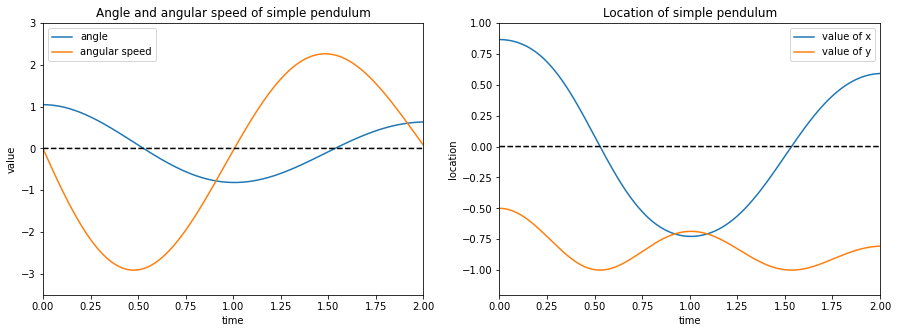

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

# ax[0]
ax[0].plot(t, results['angle'], label='angle')
ax[0].plot(t, results['speed'], label='angular speed')
ax[0].plot(t, np.zeros(2000), color='black', linestyle='--')
ax[0].axis([0,2,-3.5,3])
ax[0].set_title('Angle and angular speed of simple pendulum')
ax[0].set_xlabel('time')
ax[0].set_ylabel('value')
ax[0].legend()

# ax[1]
ax[1].plot(t, results['x'], label='value of x')
ax[1].plot(t, results['y'], label='value of y')
ax[1].plot(t, np.zeros(2000), color='black', linestyle='--')
ax[1].axis([0,2,-1.2,1])
ax[1].set_title('Location of simple pendulum')
ax[1].set_xlabel('time')
ax[1].set_ylabel('location')
ax[1].legend()

<font color = "darkblue">The graph on the left makes sense if we imagine how the pendulum movement would be if the pendulum was hanging from the point [0,0]. However, we feel that the intersection of the two lines don't give us any information. If we would instead plot a pendulum, that has it's resting point at [0,0], then this would allow us a better interpretation of the graph. Let's see:

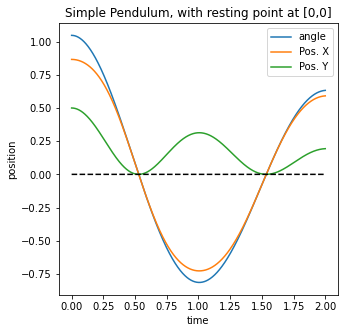

In [9]:
fig, ax = plt.subplots(figsize=(5,5))

#fig2, ax = plt.subplots(figsize=(8,5))
ax.plot(t, results['angle'], label="angle")
ax.plot(t, results['x'], label='Pos. X')
ax.plot(t, 1+results['y'], label='Pos. Y')
ax.plot(t, np.zeros(2000), color='black', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('position')
ax.set_title("Simple Pendulum, with resting point at [0,0]")

ax.legend()

<font color='darkblue'>As we can see, a pendulum with resting point [0,0] is easier to interpret. We notice two intersection points, which is where the pendulum is at its resting point at t=0.5 and t=1.5. Also the point where the pendulum is at its higherst position is clearly visible in the graph at point t=0, t=1 and t=2. 

<font color = "darkblue">Another possibility to display the x and y location is in dependence of the angle or in dependence of the angular speed. For this we move back to our original pendulum which had it's resting point at [0,-1]. 

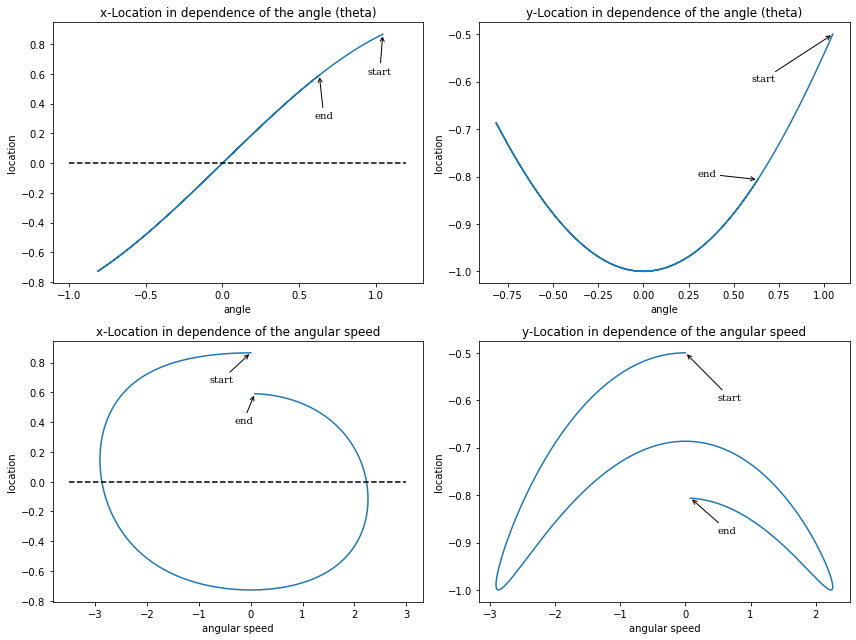

In [10]:
#plot
fig, ax = plt.subplots(2,2,figsize=(12,9))

# x in dependence of angle
ax[0,0].plot(results['angle'], results['x'], label='value of x')
ax[0,0].plot(np.linspace(-1,1.2,100), np.zeros(100), color='black', linestyle='--')
ax[0,0].set_title('x-Location in dependence of the angle (theta)')
ax[0,0].set_xlabel('angle')
ax[0,0].set_ylabel('location')
ax[0,0].annotate('start', fontsize=10, family="serif", xy=(results['angle'][0], results['x'][0]), xytext=(0.95,0.6), arrowprops=dict(arrowstyle="->"))
ax[0,0].annotate('end', fontsize=10, family="serif", xy=(results['angle'][1999], results['x'][1999]), xytext=(0.6,0.3), arrowprops=dict(arrowstyle="->"))

# y in dependence of angle
ax[0,1].plot(results['angle'], results['y'], label='value of y')
ax[0,1].set_title('y-Location in dependence of the angle (theta)')
ax[0,1].set_xlabel('angle')
ax[0,1].set_ylabel('location')
ax[0,1].annotate('start', fontsize=10, family="serif", xy=(results['angle'][0], results['y'][0]), xytext=(0.6,-0.6), arrowprops=dict(arrowstyle="->"))
ax[0,1].annotate('end', fontsize=10, family="serif", xy=(results['angle'][1999], results['y'][1999]), xytext=(0.3,-0.8), arrowprops=dict(arrowstyle="->"))


# x in dependence of angular speed
ax[1,0].plot(results['speed'], results['x'])
ax[1,0].plot(np.linspace(-3.5,3,100), np.zeros(100), color='black', linestyle='--')
ax[1,0].set_title('x-Location in dependence of the angular speed')
ax[1,0].set_xlabel('angular speed')
ax[1,0].set_ylabel('location')
ax[1,0].annotate('start', fontsize=10, family="serif", xy=(results['speed'][0], results['x'][0]), xytext=(results['speed'][0]-0.8, results['x'][0]-0.2), arrowprops=dict(arrowstyle="->"))
ax[1,0].annotate('end', fontsize=10, family="serif", xy=(results['speed'][1999], results['x'][1999]), xytext=(results['speed'][1999]-0.4, results['x'][1999]-0.2), arrowprops=dict(arrowstyle="->"))

# y in dependence of angular speed
ax[1,1].plot(results['speed'], results['y'], label='value of y')
ax[1,1].set_title('y-Location in dependence of the angular speed')
ax[1,1].set_xlabel('angular speed')
ax[1,1].set_ylabel('location')
ax[1,1].annotate('start', fontsize=10, family="serif", xy=(results['speed'][0], results['y'][0]), xytext=(0.5,-0.6), arrowprops=dict(arrowstyle="->"))
ax[1,1].annotate('end', fontsize=10, family="serif", xy=(results['speed'][1999], results['y'][1999]), xytext=(0.5,-0.88), arrowprops=dict(arrowstyle="->"))

fig.tight_layout()

<font color='darkblue'>We remember, that we calcualted the pendulum movement for t=2, which means 2 pendulum swings. In the graphics on the top we can see, that the x and y positions repeat itself whith each swing. However, with each swing the maximal absolute value for x is decreasing towards 0. When we look at the y value we observe, that the minimum value of -1 remains constant, wheras the maximum value of y will decrease with each swing towards -1. 
    
<font color='darkblue'>In the graphics on the bottom our plots forms an interesting pattern. If we would plot our data for t>2 we would see a spiral in the left graph, and a pattern that is hard to describe in the right graph. Let's have a quick look: 

Text(0.5, -0.88, 'end')

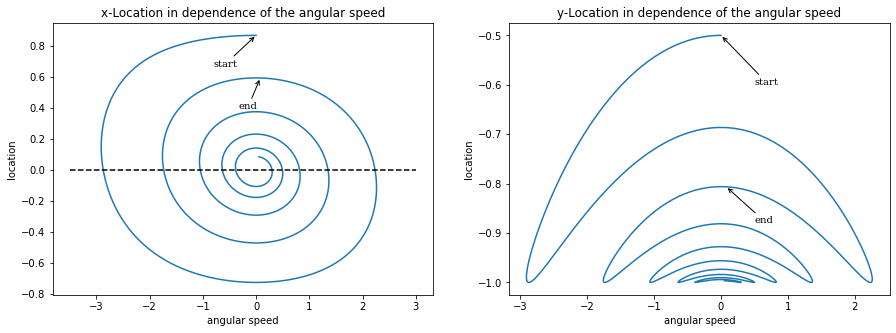

In [11]:
# time steps
t2 = np.linspace(0,10,2000)

# calculate movement
u_n = spi.odeint(vdt, v_0, t2)

# calculate x,y and write results into DataFrame 
results2 = pd.DataFrame({'angle':u_n[:,0], 'x':x_vect(L,u_n[:,0]), 'y':y_vect(L,u_n[:,0]), 'speed':u_n[:,1]})

#plot
fig, ax = plt.subplots(1,2,figsize=(15,5))

# x in dependence of angular speed
ax[0].plot(results2['speed'], results2['x'])
ax[0].plot(np.linspace(-3.5,3,100), np.zeros(100), color='black', linestyle='--')
ax[0].set_title('x-Location in dependence of the angular speed')
ax[0].set_xlabel('angular speed')
ax[0].set_ylabel('location')
ax[0].annotate('start', fontsize=10, family="serif", xy=(results['speed'][0], results['x'][0]), xytext=(results['speed'][0]-0.8, results['x'][0]-0.2), arrowprops=dict(arrowstyle="->"))
ax[0].annotate('end', fontsize=10, family="serif", xy=(results['speed'][1999], results['x'][1999]), xytext=(results['speed'][1999]-0.4, results['x'][1999]-0.2), arrowprops=dict(arrowstyle="->"))

# y in dependence of angular speed
ax[1].plot(results2['speed'], results2['y'], label='value of y')
ax[1].set_title('y-Location in dependence of the angular speed')
ax[1].set_xlabel('angular speed')
ax[1].set_ylabel('location')
ax[1].annotate('start', fontsize=10, family="serif", xy=(results['speed'][0], results['y'][0]), xytext=(0.5,-0.6), arrowprops=dict(arrowstyle="->"))
ax[1].annotate('end', fontsize=10, family="serif", xy=(results['speed'][1999], results['y'][1999]), xytext=(0.5,-0.88), arrowprops=dict(arrowstyle="->"))

<font color='darkblue'>Further, it would be interesting to see the pendulum move in space as an animation. Instead, we can also just plot the location of the pendulum during the 2000 timesteps:

Text(0.2, -0.1, 'pendulum at t=2')

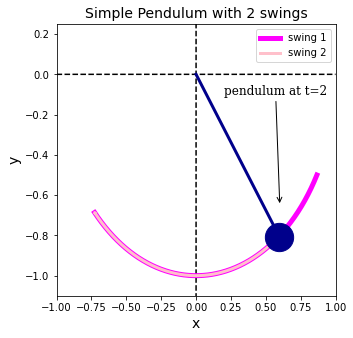

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.axis([-1,1,-1.1,0.25])

# plot x and y axis
ax.plot(np.linspace(-1,1,2000), np.zeros(2000), color='black', linestyle='--', zorder=0)
ax.plot(np.zeros(2000), np.linspace(0.5,-1.5,2000), color='black', linestyle='--', zorder=0)

# plot first swing from right to left
ax.plot(results['x'][:1000], results['y'][:1000], lw=5, color='magenta', label='swing 1', zorder=1)

# plot second swing from left to right
ax.plot(results['x'][1000:], results['y'][1000:], lw=3, color='pink', label='swing 2', zorder=1)

# plot pendulum
ax.scatter(results['x'][1999], results['y'][1999], s=800, color='darkblue', zorder=3)
ax.plot(np.linspace(0,results['x'][1999],100),1.35*-np.linspace(0,results['x'][1999],100), lw=3, color='darkblue', zorder=3)

# title, labels and legend
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Simple Pendulum with 2 swings', fontsize=14)
ax.legend()

# annotation
ax.annotate('pendulum at t=2', fontsize=12, family="serif", xy=(0.6,-0.65), xytext=(0.2,-0.1), arrowprops=dict(arrowstyle="->"))

# Double Pendulum

<font color='darkblue'>Let's first define our two ODE's with Sympy:

In [14]:
m_1, m_2, l_1, l_2, t, g = sym.symbols('m_1, m_2, l_1, l_2, t, g')
theta = sym.symbols('theta')
Theta_1 = sym.Function('theta_1')('t')
Theta_2 = sym.Function('theta_2')('t')
ode1_original = sym.Eq((m_1+m_2)*l_1*Theta_1.diff(t,t) + m_2*l_2*Theta_2.diff(t,t)*sym.cos(Theta_1-Theta_2) + m_2*l_2*Theta_2.diff(t)**2*sym.sin(Theta_1-Theta_2) + g*(m_1+m_2)*sym.sin(Theta_1),0)
ode1_original              

Eq(g*(m_1 + m_2)*sin(theta_1(t)) + l_1*(m_1 + m_2)*Derivative(theta_1(t), (t, 2)) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_2(t), (t, 2)), 0)

In [15]:
ode2_original = sym.Eq(m_2*l_2*Theta_2.diff(t,t) + m_2*l_1*Theta_1.diff(t,t)*sym.cos(Theta_1-Theta_2) - m_2*l_1*Theta_1.diff(t)**2*sym.sin(Theta_1-Theta_2) + g*m_2*sym.sin(Theta_2),0)
ode2_original

Eq(g*m_2*sin(theta_2(t)) - l_1*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 + l_1*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), (t, 2)) + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

<font color='darkblue'>With the help of a dictionary we now use Sympy to replace some of the Symbols in our two ODE's:
    
<font color='darkblue'>$y_1(t)=\theta_1(t)$

<font color='darkblue'>$y_2(t)=\theta_1^{'}(t)$ ➜ $y_2^{'}(t)=\theta_1^{''}(t)$

<font color='darkblue'>$y_3(t)=\theta_2(t)$

<font color='darkblue'>$y_4(t)=\theta_2^{'}(t)$  ➜  $y_4^{'}(t)=\theta_2^{''}(t)$    

In [16]:
# define new symbols
y1 = sym.Function("y_1")("t")
y2 = sym.Function("y_2")("t")
y3 = sym.Function("y_3")("t")
y4 = sym.Function("y_4")("t")

# make dictionay
swap = {Theta_1.diff(t,t):y2.diff(t), Theta_1:y1, Theta_2.diff(t,t):y4.diff(t), Theta_2:y3}

# swap the symbols
ode1 = ode1_original.subs(swap)
ode2 = ode2_original.subs(swap)

<font color='darkblue'>As a result, we now also have these two equations:
    
<font color='darkblue'>$y_1(t)^{'} - y_2(t) = 0$    

<font color='darkblue'>$y_3(t)^{'} - y_4(t) = 0$ 

In [17]:
ode3 = y1.diff(t)-y2
ode4 = y3.diff(t)-y4

<font color='darkblue'>Altogether we have now 4 equations, which we can use to set up an equation system. We use Sympy to solve it. With the help of `sympy.solve()` we can use our 4 equations to get the first derivative of our y-vector:
 
<font color='darkblue'>    
$\frac{d}{dt}\left(\begin{array}{c}
y_{1}\\
y_{2}\\
y_{3}\\
y_{4}\\
 \end{array}\right) = \left(\begin{array}{c}
y_{2}(t)\\
?\\
y_{4}(t)\\
?\end{array}\right)$ 

In [24]:
# create y vector
y = sym.Matrix([y1,y2,y3,y4])

# solve equation system: 
# sym.solve returns a list of dictionaries (with only one entry)
solution = sym.solve((ode1, ode2, ode3, ode4), y.diff(t), dict=True)

# substitue calculated derivatives into y.diff(t)
f = y.diff(t).subs(solution[0])
f

Matrix([
[                                                                                                                                                                                                                                                                                    y_2(t)],
[                                                                       (g*m_1*sin(y_1(t)) + g*m_2*sin(y_1(t) - 2*y_3(t))/2 + g*m_2*sin(y_1(t))/2 + l_1*m_2*y_2(t)**2*sin(2*y_1(t) - 2*y_3(t))/2 + l_2*m_2*y_4(t)**2*sin(y_1(t) - y_3(t)))/(l_1*(-m_1 + m_2*cos(y_1(t) - y_3(t))**2 - m_2))],
[                                                                                                                                                                                                                                                                                    y_4(t)],
[(g*m_1*sin(2*y_1(t) - y_3(t)) - g*m_1*sin(y_3(t)) + g*m_2*sin(2*y_1(t) - y_3(t)) - g*m_2*sin(y_3(t)) + 2*l_1*m_1*y_2(t)**2*sin(y_1(t

<font color='darkblue'>This is the first derivative of the y-vector, which we were able to compute thanks to the system of equations we set up earlier.

<font color='darkblue'>In the next step we use lamdify, to convert our solution into a python function, which we will call `func1`. Further, we want to set values for the constants. This will be done with the help of a dictionary.
    
<font color='darkblue'>- $m_1 = 5.0$,  $m_2 = 1.0$
    
<font color='darkblue'>- $L_1 = 2.0$, $L_2 = 1.0$
    
<font color='darkblue'>- $g=9.81$   
    
<font color='darkblue'>Additionaly we use the function `flatten` to get a 1D representation of the results. This is necessary if we want to use `scipy.integrate.odeint()` to compute the motion of the double pendulum.

In [25]:
constants = {m_1:5.0, m_2:1.0, l_1:2.0, l_2:1.0, g:9.81}
func1 = sym.lambdify((y,t), f.subs(constants), 'numpy')
func1_flattend = lambda _y, _t, *args : func1(_y,_t).flatten()

<font color='darkblue'>Now we are finally ready to compute the motion of our double pendulum. Later on in the excercises we are going to try out some alternative methods for computing motion. For each method we are saving its execution time in the array `'exe_time'`, so that we can compare the different approaches on the basis of time taken to compute. 
    
<font color='darkblue'>We initialze the values for $\theta_{1}$ with $\frac{\pi}{2}$ and $\theta_{1}$ with $0$. The speed of both pendulums is 0 at the start. So we get a y-vector equal to [$\frac{\pi}{2}$,0,0,0].

In [26]:
# initalize variables
exe_time = np.zeros(3)
y0 = np.array([np.pi/2,0,0,0])
t0 = np.linspace(0,20,10000) #10'000 time steps within 20 seconds

# calcualte movement
start = time.perf_counter()
y_solve1 = spi.odeint(func1_flattend, y0, t0)
end = time.perf_counter()

# save execution time
exe_time[0] = end-start

<font color='darkblue'>Our solution is now saved in the 2D array y_solve1. Each row contains the data for one time step. The first column represents the Theta value (angle) of the first pendulum, the second column is the speed of the first pendulum, the third column is the Theta value (angle) of the second pendulum and the forth column is the speed of the second pendulum.
    
<font color='darkblue'>This data we could use to calculate the exact positions of both pendulums for each time step. In a second step we could display the locations of our two pendulums in a graph or even in an animation.

<font color='darkblue'>Before we do this, we are going to try out some other methods. First, we are going to compute the pendula motion with the use of scipy.integrate.ode(), which should give us similar results. Second, we are trying to speed up the calculations with scipy.integrate.ode() by passing the Jacobi Matrix to this function. Let's see how much time we use for each of these options. 

<font color='darkblue'>As we already imported scipy.integrate as spi, we can just call the function with `'spi.ode'`.
    
<font color='darkblue'>We are again running almost the same code but with two differences: 
    
<font color='darkblue'>1. We exchange the position of t and y, 
<font color='darkblue'>2. We don't need to use flatten. The function can be directly passed to spi.ode(). 
    
<font color='darkblue'>Spi.ode() will return an instance of the class `integrate.ode`, which we save in the variable `'solver'`. 

In [27]:
_func2 = sym.lambdify((t,y), f.subs(constants), 'numpy')
func2 = lambda _t, _y, *args : _func2(_t,_y)
solver = spi.ode(func2)

<font color='darkblue'>Now that we have our solver object, we can configure it by setting some initial values. We pass the initial y-vector and the first time step. Further, we set the integrator to 'lsoda'. Lsoda is a solver that does not require further arguments.

In [28]:
solver.set_initial_value(y0,t0[0])
solver.set_integrator('lsoda')

<font color='darkblue'>Our solver has a few methods, that we are going to use for the motion computations. With solver.integrate(timestep) we can solve our ODE step by step. The solution of the integration step will be saved in the solver's attribute 'y', which we have to save into our y_solution vector. With `solver.successful()` we can check, whether the last integration step was successful. To get the current time step that our solver is at we can use the solver's attribute 't'.

In [29]:
# initalize variables
y_solve2 = np.zeros((len(t0), len(y0)))
dt = t0[1]-t0[0]

# calculate the movement
start = time.perf_counter()
for i in range(len(t0)):
    if solver.successful():
        y_solve2[i,:] = solver.y
        solver.integrate(solver.t+dt)
    else:
        print('The integration was not successful at timestep nr.{}'.format(i+1))
        break
end = time.perf_counter()

# save execution time 
exe_time[1]=end-start

<font color='darkblue'>If our calculations are right, the solutions of the first method and the second method should give us more or less the same results. Let's have a quick look:

In [30]:
y_solve1==y_solve2

array([[ True,  True,  True,  True],
       [False, False, False, False],
       [False, False, False, False],
       ...,
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

<font color='darkblue'>As we can see, our solutions are not identical. What would happen if we round the values? We check for every 400th element:

In [31]:
y_solve1[::400].round(2)==y_solve2[::400].round(2)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

<font color='darkblue'>We observe, that the more we move forward in time, the less similar the solution vectors are going to be. 

In [32]:
difference = np.abs(y_solve1-y_solve2)
difference

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.06754638e-11, 1.05818132e-16, 2.81129110e-11, 1.37342809e-08],
       [5.06754638e-11, 1.17961196e-16, 6.18595044e-11, 1.44380093e-08],
       ...,
       [4.38716333e-03, 1.05702321e-01, 1.58192784e-01, 2.45956330e-01],
       [4.17338193e-03, 1.08030406e-01, 1.57697996e-01, 2.48700125e-01],
       [3.95510228e-03, 1.10201507e-01, 1.57198194e-01, 2.50975253e-01]])

<font color = "darkblue">This discrepancies between both results migh be a product of floating point rounding errors which accumulate through the procedure. As more steps are added, there would be a greater accumulated error on the results.

<font color='darkblue'>We can speed up the calculations if we use Scipy to calcualte the `Jacobi Matrix`, which we can then pass to our solver. Again we save the execution time in the array `'exe_time'`:

In [33]:
# Jacobi Matrix
J = sym.Matrix([[f_j.diff(y_i) for y_i in y] for f_j in f])
J_np = sym.lambdify((t,y),J.subs(constants), 'numpy') 

# Create Solver
solver2 = spi.ode(func2, J_np)
solver2.set_initial_value(y0,t0[0])
solver2.set_integrator('lsoda')

# initalize variables
y_solve3 = np.zeros((len(t0), len(y0)))

# calculate the movement
start = time.perf_counter()
for i in range(len(t0)):
    if solver2.successful():
        y_solve3[i,:] = solver2.y
        solver2.integrate(solver2.t+dt)
    else:
        print('The integration was not successful at timestep nr.{}'.format(i+1))
        break
end = time.perf_counter()

# save execution time 
exe_time[2]=end-start

In [34]:
print('Speed in seconds if pedulum movement is calculated with:') 
print('  `scipy.integrate.odeint()`: {} s.'.format(exe_time[0]))
print('  `scipy.integrate.ode()` without Jacobi Matrix: {} s.'.format(exe_time[1]))
print('  `scipy.integrate.ode()` with Jacobi Matrix: {} s.'.format(exe_time[2]))

Speed in seconds if pedulum movement is calculated with:
  `scipy.integrate.odeint()`: 0.12432830000000195 s.
  `scipy.integrate.ode()` without Jacobi Matrix: 0.15454139999997096 s.
  `scipy.integrate.ode()` with Jacobi Matrix: 0.13847650000002432 s.


<font color='darkblue'>We can see, that the use of the Jacobi Matrix has speeded up the calculations quite a bit. However, the fastest results we still get with `scipy.integrate.odeint()`.
    
<font color='darkblue'>For each one of these methods we have now a solution matrix. The last two solutions should be identical though, as the method has not changed. We just speeded up the function `scipy.integrate.ode()` by passing the Jacobi Matrix, so the results should not be different. Let's have have a look:  

In [35]:
y_solve3.all()==y_solve2.all()

True

<font color='darkblue'>Earlier we saw, that `scipy.integrate.odeint()` and `scipy.integrate.ode()` produce similar results. For the graphical display and the animation it won't matter which solution matrix we are using, as the differences are minor.

<font color='darkblue'>Now we want to graphically display the movement of the pendulum. First we need to calculate $x_1$, $y_1$, $x_2$ and $y_2$ with the following formulas:

<font color='darkblue'>$x_1 = L_1 * sin(\theta_1)$

<font color='darkblue'>$y_1 = -L_1*cos(\theta_1)$

<font color='darkblue'>$x_2 = x_1 +L_2 sin(\theta_2)$

<font color='darkblue'>$y_2 =  y_1 - L_2*cos(\theta_2)$
    
<font color='darkblue'>We define a function to calculate these values and vectorize it, so that we can use it with our `y-solve1` solution matrix. 

In [36]:
# function to get the x and y values of both pendulums
def location(l_1, l_2, theta_1, theta_2):
    x_1 = l_1 * np.sin(theta_1)
    y_1 = -l_1 * np.cos(theta_1)
    x_2 = x_1 + l_2*np.sin(theta_2)
    y_2 = y_1 - l_2*np.cos(theta_2)
    return x_1, y_1, x_2, y_2

# vectorized version
location_vect = np.vectorize(location)

# initialize lengths of pendulums
l_1 = 2.0
l_2 = 1.0

# calculate x and y values of both pendulums
x_1, y_1, x_2, y_2 = location_vect(l_1, l_2, y_solve1[:,0], y_solve1[:,2])

<font color='darkblue'>We thought it would be a nice display the graph that shows $x_2$ over $y_2$ with a gradient color line. On stackoverflow (https://stackoverflow.com/questions/8500700/how-to-plot-a-gradient-color-line-in-matplotlib) we found a function, which plots a gradient colored line. To use the function `colored_line`, we had to made minor changes to it: 

In [37]:
# function to plot a gradient line: 
def colored_line(x, y, z=None, linewidth=1, MAP='jet', ax_number=0):
    # this uses pcolormesh to make interpolated rectangles
    xl = len(x)
    [xs, ys, zs] = [np.zeros((xl,2)), np.zeros((xl,2)), np.zeros((xl,2))]

    # z is the line length drawn or a list of vals to be plotted
    if z == None:
        z = [0]

    for i in range(xl-1):
        # make a vector to thicken our line points
        dx = x[i+1]-x[i]
        dy = y[i+1]-y[i]
        perp = np.array( [-dy, dx] )
        unit_perp = (perp/np.linalg.norm(perp))*linewidth

        # need to make 4 points for quadrilateral
        xs[i] = [x[i], x[i] + unit_perp[0]]
        ys[i] = [y[i], y[i] + unit_perp[1]]
        xs[i+1] = [x[i+1], x[i+1] + unit_perp[0]]
        ys[i+1] = [y[i+1], y[i+1] + unit_perp[1]]

        if len(z) == i+1:
            z.append(z[-1] + (dx**2+dy**2)**0.5)     
        # set z values
        zs[i] = [z[i], z[i] ] 
        zs[i+1] = [z[i+1], z[i+1] ]

    cm = plt.get_cmap(MAP)
    ax[ax_number].pcolormesh(xs, ys, zs, shading='gouraud', cmap=cm)

<font color='darkblue'>Now we can plot our data. First we plot the x and y values for each pendulum over the time steps. Then we plot  $x_2$ over $y_2$ with a gradient color line.

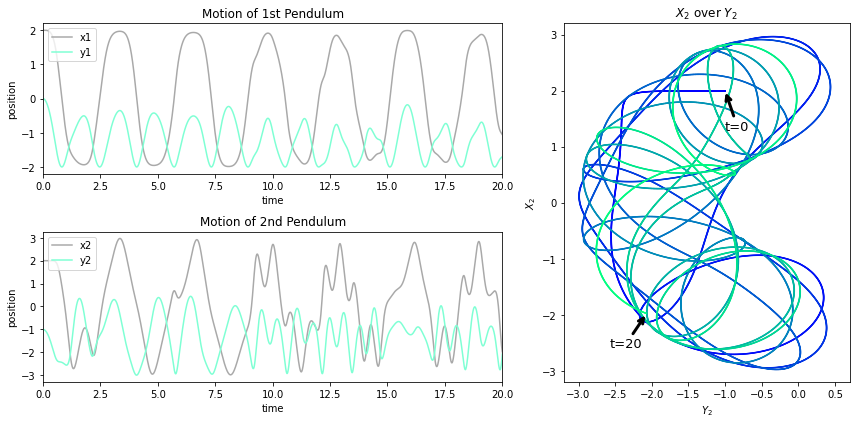

In [38]:
# create figure
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0]= plt.subplot2grid((2,5),(0,0), colspan=3)
ax[1] = plt.subplot2grid((2,5),(1,0), colspan=3)
ax[2] = plt.subplot2grid((2,5),(0,3), colspan=2, rowspan=3)

# position of 1st pendulum
ax[0].plot(t0, x_1, c='darkgrey', label='x1')
ax[0].plot(t0, y_1, c='aquamarine', label='y1')
ax[0].set_ylabel('position')
ax[0].set_xlabel('time')
ax[0].set_title('Motion of 1st Pendulum')
ax[0].set_xlim(0,20)
ax[0].legend(loc='upper left')

# position of 2nd pendulum
ax[1].plot(t0, x_2, c='darkgrey', label='x2')
ax[1].plot(t0, y_2, c='aquamarine', label='y2')
ax[1].set_ylabel('position')
ax[1].set_xlabel('time')
ax[1].set_title('Motion of 2nd Pendulum')
ax[1].set_xlim(0,20)
ax[1].legend(loc='upper left')

# X_2 over Y_2
colored_line(y_2, x_2, linewidth = 0.01, ax_number=2, MAP='winter')
ax[2].set_ylabel(r'$X_2$')
ax[2].set_xlabel(r'$Y_2$')
ax[2].set_title('$X_2$ over $Y_2$')
ax[2].annotate('t=0', fontsize=13, xy=(y_2[0], x_2[0]), xytext=(y_2[0], x_2[0]-0.7), arrowprops=dict(arrowstyle="->", lw=3))
ax[2].annotate('t=20', fontsize=13, xy=(y_2[-1], x_2[-1]),xytext=(y_2[-1]-0.5, x_2[-1]-0.6), arrowprops=dict(arrowstyle="->", lw=3))
ax[2].axis([-3.2,0.7,-3.2,3.2])

fig.tight_layout()

<font color='darkblue'>If we used our results from `scipy.integrate.ode()` instead, then we would obtain the same figure (at least to the human eye):

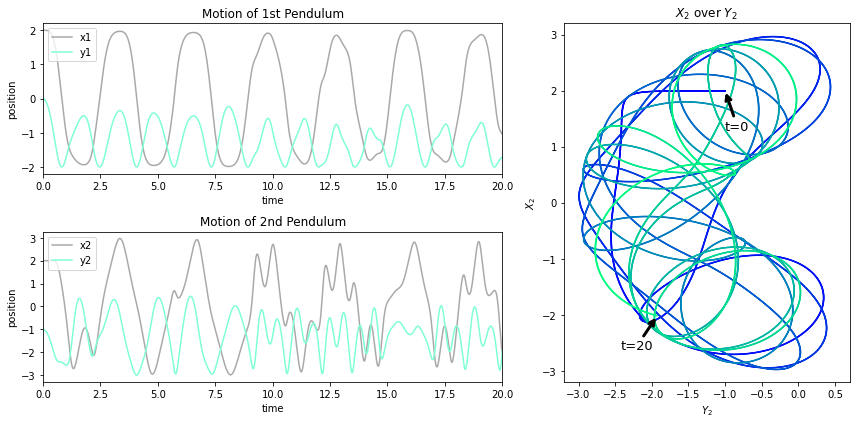

In [39]:
# calculate x and y locations
x_1, y_1, x_2, y_2 = location_vect(l_1, l_2, y_solve2[:,0], y_solve2[:,2])

# create figure
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0]= plt.subplot2grid((2,5),(0,0), colspan=3)
ax[1] = plt.subplot2grid((2,5),(1,0), colspan=3)
ax[2] = plt.subplot2grid((2,5),(0,3), colspan=2, rowspan=3)

# position of 1st pendulum
ax[0].plot(t0, x_1, c='darkgrey', label='x1')
ax[0].plot(t0, y_1, c='aquamarine', label='y1')
ax[0].set_ylabel('position')
ax[0].set_xlabel('time')
ax[0].set_title('Motion of 1st Pendulum')
ax[0].set_xlim(0,20)
ax[0].legend(loc='upper left')

# position of 2nd pendulum
ax[1].plot(t0, x_2, c='darkgrey', label='x2')
ax[1].plot(t0, y_2, c='aquamarine', label='y2')
ax[1].set_ylabel('position')
ax[1].set_xlabel('time')
ax[1].set_title('Motion of 2nd Pendulum')
ax[1].set_xlim(0,20)
ax[1].legend(loc='upper left')

# X_2 over Y_2
colored_line(y_2, x_2, linewidth = 0.01, ax_number=2, MAP='winter')
ax[2].set_ylabel(r'$X_2$')
ax[2].set_xlabel(r'$Y_2$')
ax[2].set_title('$X_2$ over $Y_2$')
ax[2].annotate('t=0', fontsize=13, xy=(y_2[0], x_2[0]), xytext=(y_2[0], x_2[0]-0.7), arrowprops=dict(arrowstyle="->", lw=3))
ax[2].annotate('t=20', fontsize=13, xy=(y_2[-1], x_2[-1]),xytext=(y_2[-1]-0.5, x_2[-1]-0.6), arrowprops=dict(arrowstyle="->", lw=3))
ax[2].axis([-3.2,0.7,-3.2,3.2])

fig.tight_layout()

<font color='darkblue'>Just as we expected, we can't see any difference. 

# Simulation of the double pendulum

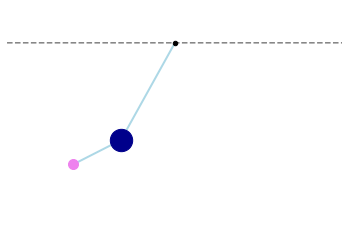

In [40]:
# run rc function
rc('animation', html='jshtml')

# timesteps
timesteps=1000

# animate function
def animate(i):
    i=i*10 #use every 10th value
    string.set_data([[0, x_1[i], x_2[i]], [0, y_1[i], y_2[i]]])
    pendulum_1.set_offsets([x_1[i], y_1[i]])
    pendulum_2.set_offsets([x_2[i], y_2[i]])
    return string, pendulum_1, pendulum_2

# init_function
def init():
    string.set_data([],[])
    pendulum_1.set_offsets([])
    pendulum_2.set_offsets([])
    return string, pendulum_1, pendulum_2

# create figure
fig, ax = plt.subplots()

# plot string and pendulums
string, = ax.plot([], [], c='lightblue', zorder=1, lw=2)
pendulum_1 = ax.scatter([], [], s=constants[m_1]*100, c ='darkblue', zorder=2)
pendulum_2 = ax.scatter([], [], s=constants[m_2]*100, c ='violet', zorder=2)

# plot x-axis
ax.plot(np.linspace(-3.5,3.5,2000), np.zeros(2000), color='grey', linestyle='--', zorder=0)

# plot pendulum holder
ax.scatter(0, 0, s=20, c='black', zorder=2)

# configure axis
ax.set_axis_off()
ax.set_xlim(min(np.min(x_2),np.min(x_1))-0.2, max(np.max(x_2),np.max(x_1))+0.2)
ax.set_ylim(min(np.min(y_2),np.min(y_1))-0.2, max(np.max(y_2),np.max(y_1))+0.2)

# create animation
anim = animation.FuncAnimation(fig, animate, timesteps,
                               interval=10, blit=True,
                               init_func=init)
# show animation
anim

<font color='darkblue'>Our animation is behaving how we would expect it. This makes us feel confident, that we have made correct calculations in the previous steps.